In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Reduced Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$


- Function RIT computes the reduced inertia tensor

In [239]:
def A(V, x_cm, y_cm, z_cm):
    R = np.sqrt((V[0,:] - x_cm)**2 + (V[1,:] - y_cm)**2 + (V[2,:] - z_cm)**2)
    index = where(R == max(R))[0]
    return R[index]

In [229]:
def RIT(XYZ, q, s):
    I = np.zeros([3, 3])
    N = len(XYZ[0])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2 + XYZ[1,n]**2/q**2 + XYZ[2,n]**2/s**2)
                Xi = sum(XYZ[i,n])
                Xj = sum(XYZ[j,n])
                XX[n] = Xi * Xj / d**2
            I[i][j] = sum(XX)
    return I

In [17]:
def one_tensor(x, y, z):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    return XYZ

In [114]:
def sphere(n_points):
    phi = random.rand(n_points) * 2 * pi
    theta = random.rand(n_points) * 2 - 1
    R = random.rand(n_points)
    X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.0) * cos(arccos(theta))
    return X, Y, Z

def cube(n_points, theta):
    X = (random.rand(n_points) * 2.0 - 1.0)  
    Y = random.rand(n_points) * 2.0 - 1.0
    Z = (random.rand(n_points) * 20.0 - 10.0) 
    X =  X  
    Y =  cos(theta) * Y - sin(theta) * Z
    Z =  sin(theta) * Y + cos(theta) * Z
    return X, Y, Z

In [115]:
def projection(x, y, z):
    figure(figsize=(17, 5))
    subplot(1, 3, 1)
    scatter(x, y, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    scatter(x, z, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    scatter(y, z, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)

In [116]:
def Shape(XYZ, tol):
    old_q = 1.2
    old_s = 1.2
    new_q = 1.0
    new_s = 1.0 

    while((abs(new_s - old_s) > tol) & (abs(new_q - old_q) > tol)):
        old_s = new_s
        old_q = new_q
        I_test = RIT(XYZ, old_q, old_s)
        eival, evec = eig(I_test)
        oeival = sort(eival)
        XYZ = dot(evec.T, XYZ)
        #print oeival
        la = oeival[2]
        lb = oeival[1]
        lc = oeival[0]
        new_s = np.sqrt(lc/la)
        new_q = np.sqrt(lb/la)
        #print Ixy, Ixz, Iyx, Iyz, Izx, Izy
    return new_s, new_q, XYZ, evec 


In [157]:
x, y, z = cube(500, pi/4.0)

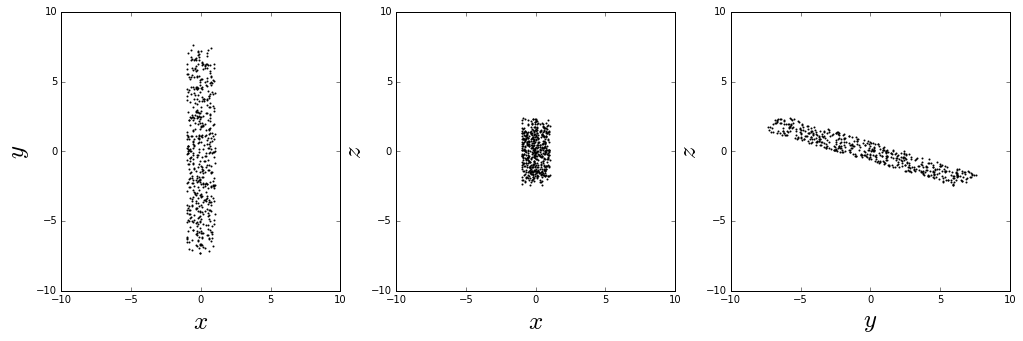

In [158]:
projection(x, y, z)

- The eigenvalues represents the axis ratios of the new set of principal axis. These values are related with $s$ and $q$
- The eigenvectors gives the rotation matrix to allign the halo with the principal axis.

In [159]:
cube_xyz = one_tensor(x, y, z)
I_test = RIT(cube_xyz, 1, 1)

In [160]:
eival, evec = eig(I_test)
print evec
print eival

[[ 0.00407215  0.99972287  0.02318606]
 [ 0.96234336 -0.01022001  0.27164462]
 [-0.2718063  -0.02120678  0.96211829]]
[ 425.81667295   50.41960871   23.76371834]


In [162]:
s, q, R, b_evec = Shape(cube_xyz, 1E-6)
print s, q, b_evec

0.0907888140138 0.130976932752 [[  1.00000000e+00  -8.42577481e-07   4.56185343e-07]
 [ -8.42577760e-07  -1.00000000e+00   6.11924914e-07]
 [ -4.56184828e-07   6.11925298e-07   1.00000000e+00]]


## Projections after finding the principal axis, $s$ and $q$

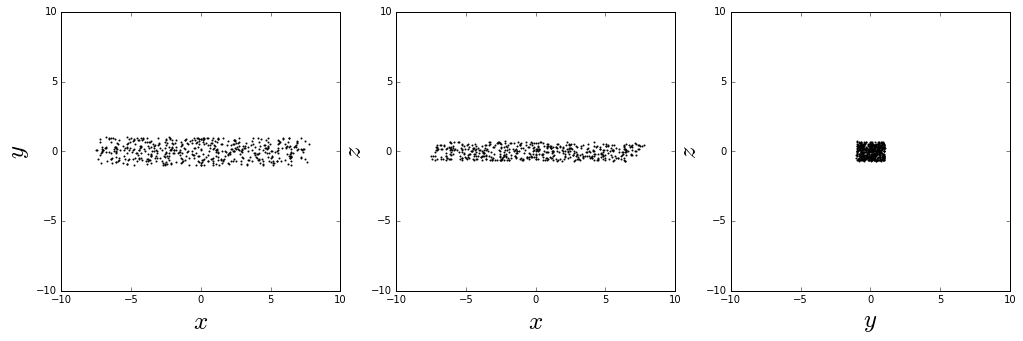

In [163]:
projection(R[0,:], R[1,:], R[2,:])

In [217]:
def Ellipsoid(a, b, c):
    theta = np.random.rand(100) * 2 - 1 
    phi = (np.random.rand(100) * 2 * pi) 
    x = a * sin(arccos(theta)) * cos(phi)
    y = b * sin(arccos(theta)) * sin(phi)
    z = c * cos(arccos(theta))
    return x, y, z

In [248]:
a = A(cube_xyz,0,0,0)
print a, q, s

[ 7.79522336] 0.130976932752 0.0907888140138


In [249]:
xe, ye, ze = Ellipsoid(a, q*a, s*a)

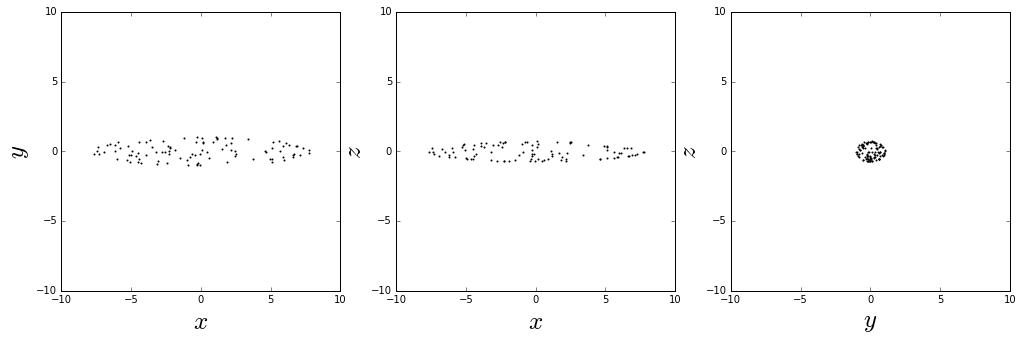

In [250]:
projection(xe, ye, ze)

In [251]:
XYZe = one_tensor(xe, ye, ze)

In [252]:
XYZ_e_rot = dot(evec, XYZe)

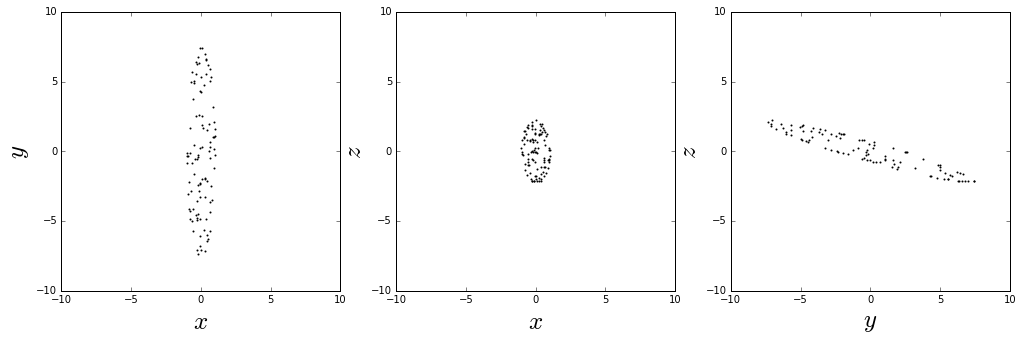

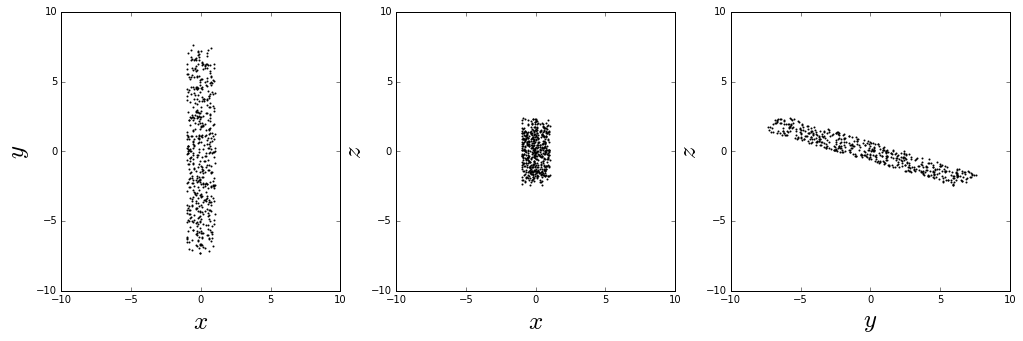

In [255]:
projection(XYZ_e_rot[0,:], XYZ_e_rot[1,:], XYZ_e_rot[2,:])
projection(x, y, z)